## Your code here

In [24]:
import numpy as np
import pandas as pd
from PIL import Image
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras import Model
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.utils import to_categorical, plot_model

In [2]:
df_1 = pd.read_csv('/content/real_estate_1.csv')
df_2 = pd.read_csv('/content/real_estate_2.csv')


In [3]:
df_1.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station
0,2012.917,32.0,84.87882
1,2012.917,19.5,306.59470
2,2013.583,13.3,561.98450
3,2013.500,13.3,561.98450
4,2012.833,5.0,390.56840


In [7]:
df_2.head()

,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,10,24.98298,121.54024,37.9
1,9,24.98034,121.53951,42.2
2,5,24.98746,121.54391,47.3
3,5,24.98746,121.54391,54.8
4,5,24.97937,121.54245,43.1


In [14]:
X_1 = df_1
X_2 = df_2.iloc[:,:-1]
y = df_2.iloc[:,-1]

In [41]:
X_1.shape,y.shape

((413, 3), (413,))

In [16]:
# Split the data into train and validation sets with 70% of the data for training and 30 for testing, set random_state as 40
X_1_train,X_1_test,X_2_train,X_2_test, y_train, y_test = train_test_split(X_1,X_2,y,train_size=0.7,random_state=40)


In [32]:
# Use the functional API to define the inputs to the model using Keras.Input
input1 = keras.Input(shape=(3,),name='layer1')
input2 = keras.Input(shape=(3,),name='layer2')

In [33]:
# Concatenate the input layers and 
input_layer = tf.keras.layers.Concatenate(axis=1)([input1, input2])

In [34]:
# pass them through dense layers and then an output layer using keras.layers.concatenate()
dense1 = layers.Dense(16,activation='elu')(input_layer)
dense2 = layers.Dense(8,activation='elu')(dense1)
output = layers.Dense(1)(dense2)

In [35]:
model = keras.Model(
    inputs=[input1,input2],
    outputs=output
)

In [0]:
model.summary()

In [45]:
# Use mean squared error as the evaluation metric to compile the model
opt = optimizers.Adam(lr=0.001)
model.compile(optimizer=opt,loss='mean_squared_error',metrics=['mean_squared_error'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [40]:
y_train.shape

(289,)

In [47]:
# Fit the model with a validation split of 20%
history = model.fit({"layer1":X_1_train,"layer2":X_2_train},y_train,epochs=600,batch_size=64,validation_split=0.2)

Epoch 1/600
4/4 [==============================] - 0s 12ms/step - loss: 57.9788 - mean_squared_error: 57.9788 - val_loss: 71.8891 - val_mean_squared_error: 71.8891
Epoch 2/600
4/4 [==============================] - 0s 12ms/step - loss: 62.2825 - mean_squared_error: 62.2825 - val_loss: 73.1411 - val_mean_squared_error: 73.1411
Epoch 3/600
4/4 [==============================] - 0s 12ms/step - loss: 57.2843 - mean_squared_error: 57.2843 - val_loss: 68.5758 - val_mean_squared_error: 68.5758
Epoch 4/600
4/4 [==============================] - 0s 11ms/step - loss: 58.3694 - mean_squared_error: 58.3694 - val_loss: 70.1039 - val_mean_squared_error: 70.1039
Epoch 5/600
4/4 [==============================] - 0s 13ms/step - loss: 56.4816 - mean_squared_error: 56.4816 - val_loss: 69.3987 - val_mean_squared_error: 69.3987
Epoch 6/600
4/4 [==============================] - 0s 16ms/step - loss: 60.0611 - mean_squared_error: 60.0611 - val_loss: 69.4593 - val_mean_squared_error: 69.4593
Epoch 7/600
4/4 

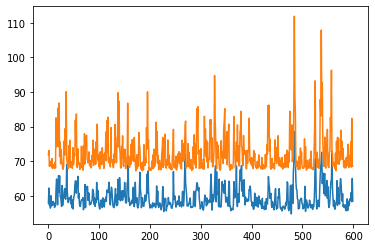

In [48]:
# Plot the training and validation loss as a function of the number of epochs used to train
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [57]:
# Print the train and validation MSE
train_loss = history.history['loss'][-1]
val_loss = history.history['val_loss'][-1]
print(f' the train MSE is {train_loss}\
    \n the validation MSE is {val_loss}')

 the train MSE is 58.48133087158203    
 the validation MSE is 68.55989837646484
